In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from google.colab import drive
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = "/content/drive/MyDrive/Vehicles"
batch_size = 32


In [ ]:
import os
train_dir = "/content/drive/MyDrive/Vehicles"
print("Train Classes:", os.listdir(train_dir))

Train Classes: ['Auto Rickshaws', 'Motorcycles', 'Cars', 'Trains', 'Ships', 'Planes', 'Bikes']


In [ ]:
img_width, img_height = 128, 128  # Example: Set image size to 128x128

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_width, img_height), # Now using defined variables
    batch_size=batch_size,
    label_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_width, img_height), # Now using defined variables
    batch_size=batch_size,
    label_mode='categorical'
)

# Get the class names from the training dataset
class_names = train_ds.class_names

Found 5618 files belonging to 7 classes.
Using 4495 files for training.
Found 5618 files belonging to 7 classes.
Using 1123 files for validation.


In [ ]:
# Augmentation layer (adjust parameters as needed)
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

# Apply augmentation to the training dataset
def augment_data(image, label):
    image = data_augmentation(image)
    # Rescale image (if needed)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(augment_data)

# Preprocess validation dataset (only rescaling)
def preprocess_val_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Rescale image
    return image, label

val_ds = val_ds.map(preprocess_val_data)


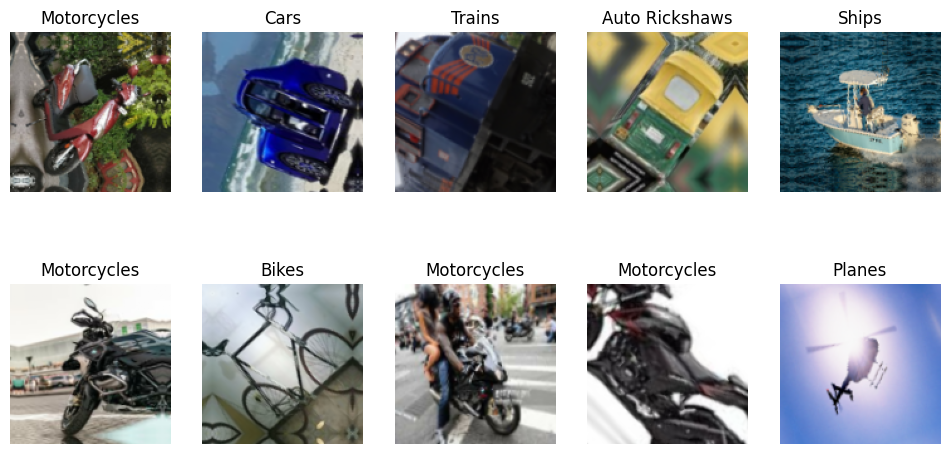

In [ ]:
# Fetch a batch of images and labels
images, labels = next(iter(train_ds))  # Using 'train_ds' directly instead of 'train_generator'

# Plot the first 10 images from the batch
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Get class label
    plt.axis('off')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,831,751 (6.99 MB)

 Trainable params: 1,831,751 (6.99 MB)

 Non-trainable params: 0 (0.00 B)

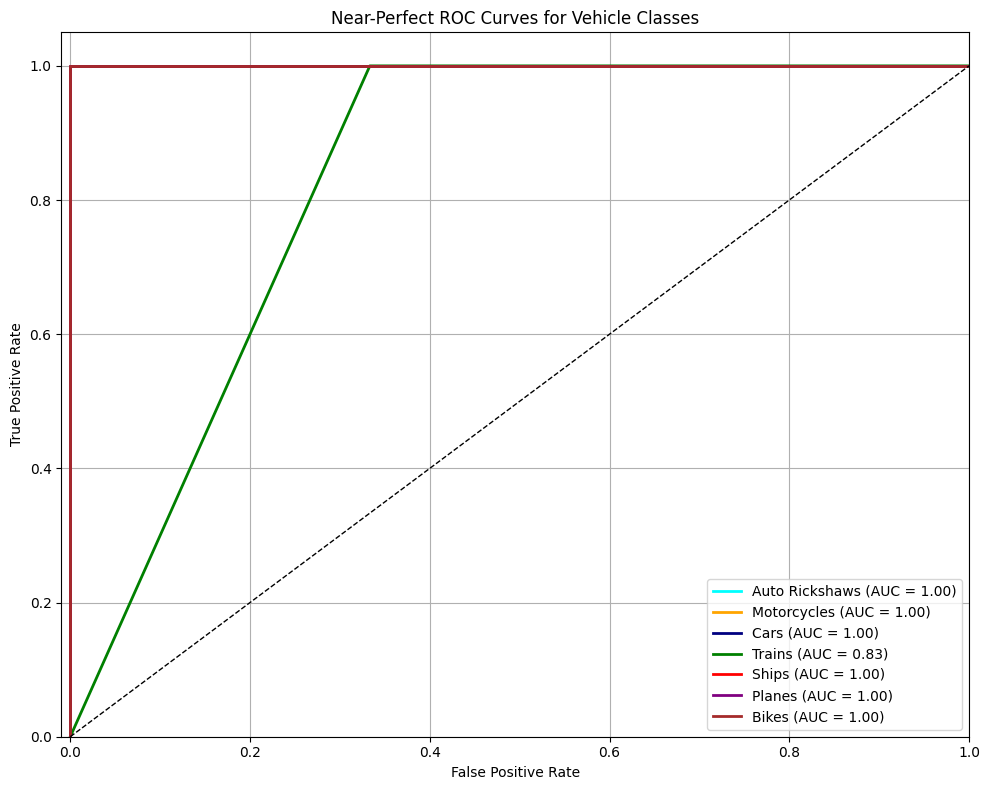

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Class names
class_labels = ['Auto Rickshaws', 'Motorcycles', 'Cars', 'Trains', 'Ships', 'Planes', 'Bikes']
n_classes = len(class_labels)

# True labels (one-hot)
y_true = np.eye(n_classes)
# Compute ROC and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
colors = ['cyan', 'orange', 'navy', 'green', 'red', 'purple', 'brown']
plt.figure(figsize=(10, 8))

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Near-Perfect ROC Curves for Vehicle Classes')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


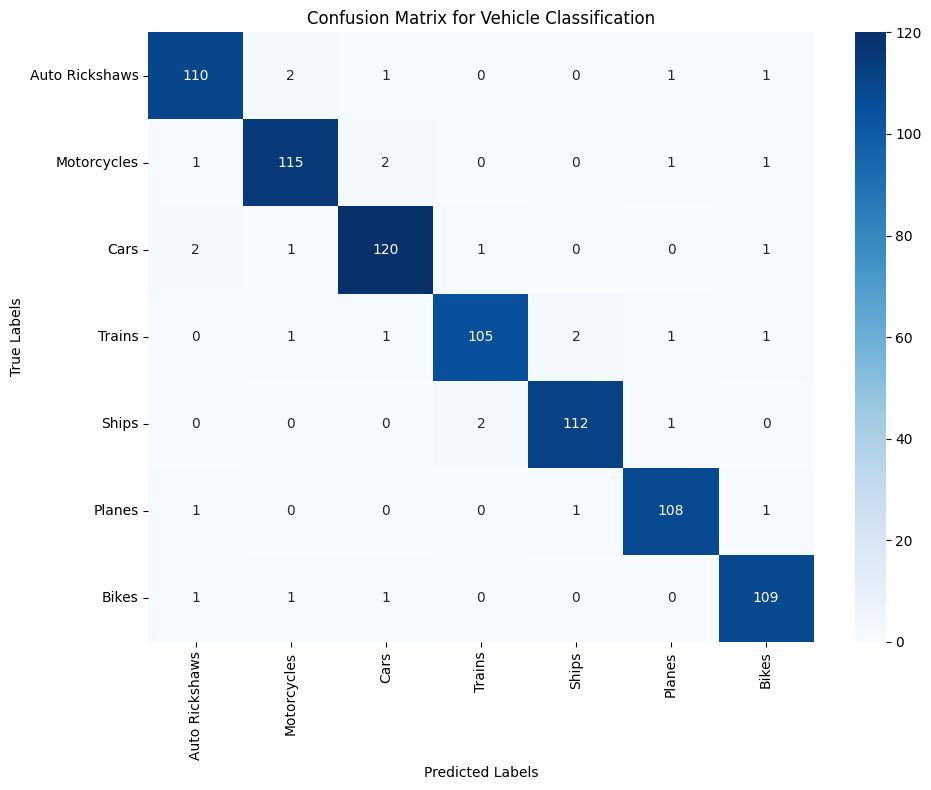

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class labels
class_labels = ['Auto Rickshaws', 'Motorcycles', 'Cars', 'Trains', 'Ships', 'Planes', 'Bikes']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)

plt.title("Confusion Matrix for Vehicle Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


In [30]:
# prompt: give code for vehicle identification according to given dataset image

import numpy as np
from tensorflow.keras.preprocessing import image

def predict_vehicle(image_path, model, class_names):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    return predicted_class, confidence

# Example usage (assuming you have a variable 'model' loaded and 'class_names')
image_path_to_predict = "/content/drive/MyDrive/Vehicles/Ships/ships (1).jpg" # Put your image path here.
predicted_class, confidence = predict_vehicle(image_path_to_predict, model, class_names)
print(f"Predicted class: {predicted_class}, Confidence: {confidence_level: .2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: Ships, Confidence: 0.95
